<a href="https://colab.research.google.com/github/suyog1234/suyog1234/blob/main/Bank_Customer_Retirement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank_df = pd.read_csv('/content/sample_data/Bank_Customer_retirement.csv')

In [3]:
bank_df.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [4]:
bank_df.shape

(500, 4)

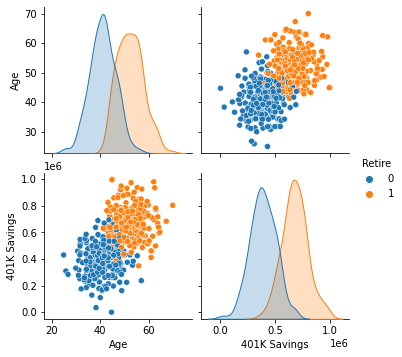

In [5]:
sns.pairplot(bank_df,hue='Retire',vars=['Age','401K Savings'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


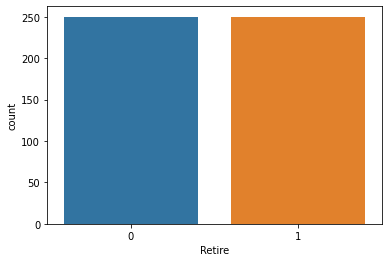

In [6]:
sns.countplot(bank_df['Retire'],label='Retirement')

In [7]:
bank_df = bank_df.drop(['Customer ID'],axis=1)

In [8]:
bank_df

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1
...,...,...,...
495,46.678128,704243.0776,1
496,43.545007,483175.9998,0
497,46.476724,354919.1987,0
498,50.903631,639789.9219,1


In [9]:
X = bank_df.drop(['Retire'],axis=1)

In [10]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [11]:
y = bank_df['Retire']

In [12]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [13]:
X.shape

(500, 2)

In [14]:
y.shape

(500,)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [17]:
X_train.shape

(375, 2)

In [18]:
X_test.shape

(125, 2)

In [19]:
y_train.shape

(375,)

In [20]:
y_test.shape

(125,)

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [23]:
y_predict = svc_model.predict(X_test)

In [24]:
cm = confusion_matrix(y_test,y_predict)

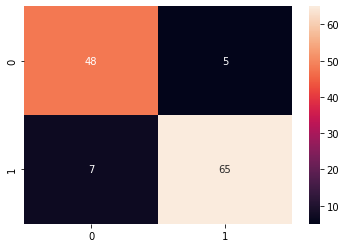

In [25]:
sns.heatmap(cm,annot=True)

In [26]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        53
           1       0.93      0.90      0.92        72

    accuracy                           0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.90      0.90      0.90       125



In [27]:
min_train = X_train.min()

In [28]:
range_train = (X_train-min_train).max()

In [29]:
X_train_scaled = (X_train-min_train)/range_train

In [30]:
X_train_scaled

,Age,401K Savings
111,0.514292,0.787630
262,0.857538,0.458287
317,0.328761,0.501945
352,0.289347,0.454088
470,0.563709,0.284506
...,...,...
486,0.315494,0.033828
189,0.281290,0.374391
495,0.512265,0.704240
206,0.510404,0.626791


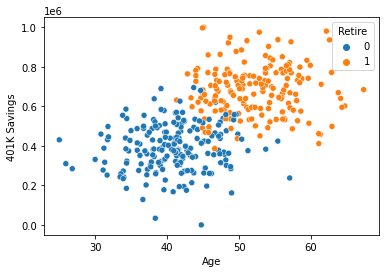

In [32]:
sns.scatterplot(x=X_train['Age'],y=X_train['401K Savings'],hue=y_train)

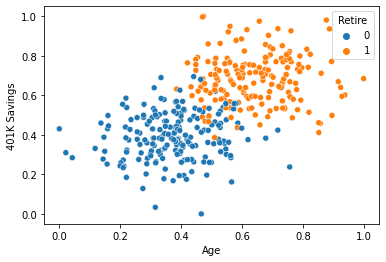

In [35]:
sns.scatterplot(x=X_train_scaled['Age'],y=X_train_scaled['401K Savings'],hue=y_train)

In [36]:
min_test = X_test.min()

In [37]:
range_test = (X_test-min_test).max()

In [38]:
X_test_scaled = (X_test-min_test)/range_test

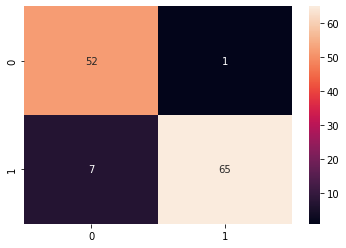

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model = SVC()
svc_model.fit(X_train_scaled,y_train)
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_predict_scaled)
sns.heatmap(cm,annot=True,fmt="d")


In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        53
           1       0.93      0.90      0.92        72

    accuracy                           0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.90      0.90      0.90       125



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.520 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.520 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.520 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.520 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

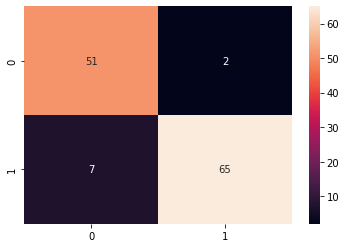

In [41]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4) 
grid.fit(X_train_scaled,y_train)
grid.best_params_
grid_predict = grid.predict(X_test_scaled)
cm = confusion_matrix(y_test,grid_predict)
sns.heatmap(cm,annot=True)

In [42]:
print(classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        53
           1       0.97      0.90      0.94        72

    accuracy                           0.93       125
   macro avg       0.92      0.93      0.93       125
weighted avg       0.93      0.93      0.93       125

